習題 1：將一張圖像 X 利用 SVD 的 “Rank q approximation”，能達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation”，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？能說出理由嗎？

1.X 不變

2.將 X 以 8\times 8 小圖（patch）進行切割，再將每個小圖拉成 64\times 1 的向量，最後重組這些向量並排成新的 64\times N 矩陣。

3.同上，小圖大小為 16\times 16/per patch。

4.同上，但分割成 32\times 32/per patch。

如何呈現最後的比較結果，請自行決定，譬如，將圖像並列比較。圖像可以選 Lenna， 也可以自行決定。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numpy.linalg import svd
import matplotlib.image as mpimg

2


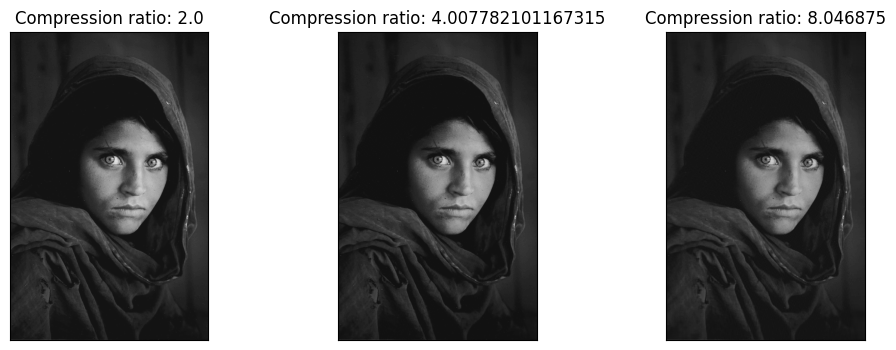

In [2]:
#x不變
imgfile = "girl.jpeg"
X = mpimg.imread(imgfile) #3200 2060
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
    #RGB各有一個512*512的矩陣，將其壓縮成黑白圖

N, p = X.shape
print(len(X.shape)) #2

U, E, VT = svd(X, full_matrices = False)

q = np.array([p/4, p/8, p/16]).astype("int") 
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] #xq = 3200 2060
    ax[i].imshow(Xq, cmap = "gray")
    ax[i].set_title("Compression ratio: {}".format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

2.8*8

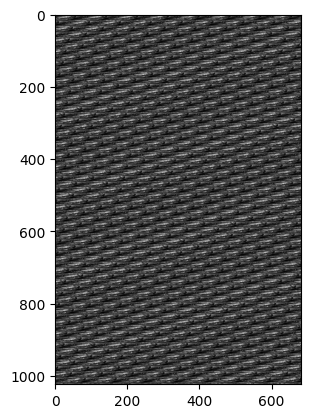

In [4]:
#以8*8切割照片
from patchify import patchify
import pandas as pd

imgfile = "girl2.jpeg"
X = mpimg.imread(imgfile) 
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

patches = patchify(X, (8, 8), step = 8)
mydata = np.zeros((64, 1))
for i in range(128):
    for j in range(85):
        a = patches[i, j, :, :]
        b = np.resize(a, (64, 1))
        mydata = np.hstack((mydata, b))

mydata = np.resize(mydata, (1024, 683))
plt.imshow(mydata, cmap = "gray")

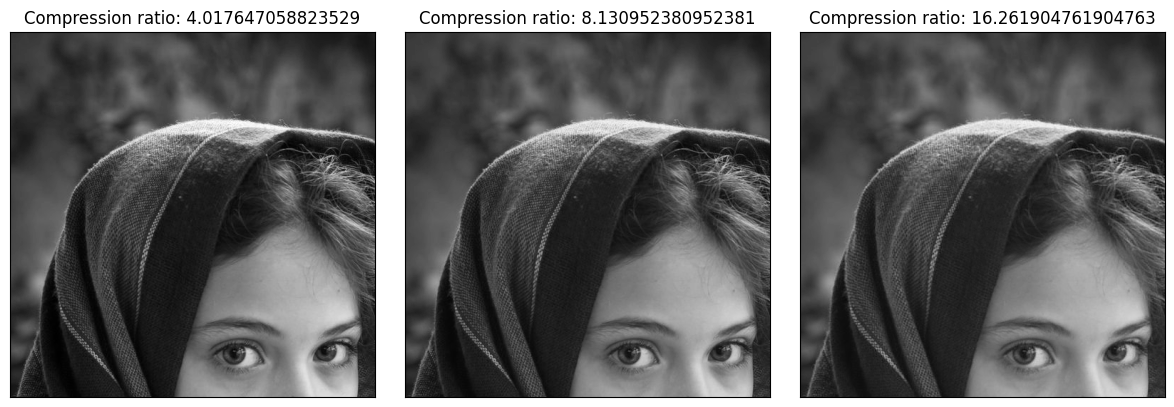

In [6]:
#以8*8切割照片
from patchify import patchify
import pandas as pd

imgfile = "girl2.jpeg"
X = mpimg.imread(imgfile) 
if len(X.shape) > 2:
    X = np.mean(X, axis=2)
N, p = X.shape

# 切割圖像成為 8x8 的小圖
patches = []
for i in range(64):
    for j in range(64):
        patch = X[i*8:(i+1)*8, j*8:(j+1)*8]
        patches.append(patch)

# 將每個小圖轉換成 64x1 的向量，再將它們組成一個 64x4096 的矩陣
X_blocks = np.array([patch.flatten() for patch in patches]).T

# 計算 SVD
U, E, VT = svd(X_blocks, full_matrices=False)

# 定義 q 值
q_vals = np.array([p/8, p/16, p/32]).astype('int') 


# 繪製每個 q 值的近似圖像
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, q in enumerate(q_vals):
    # 計算 Rank-q 近似
    Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
    
    # 將近似圖像轉換回 8x8 的小圖
    approx_patches = [Xq[:, i].reshape(8, 8) for i in range(Xq.shape[1])]
    
    # 將小圖重新組合成圖像(採用 np.vstack 以及 np.hstack 組回原本的圖像大小 512X512)
    approx_image = np.vstack([np.hstack([approx_patches[j*64+i] for i in range(64)]) for j in range(64)])     
   
    # 繪製近似圖像
    ax[i].imshow(approx_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(p/q/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()

2


ValueError: cannot reshape array of size 1024 into shape (8,8)

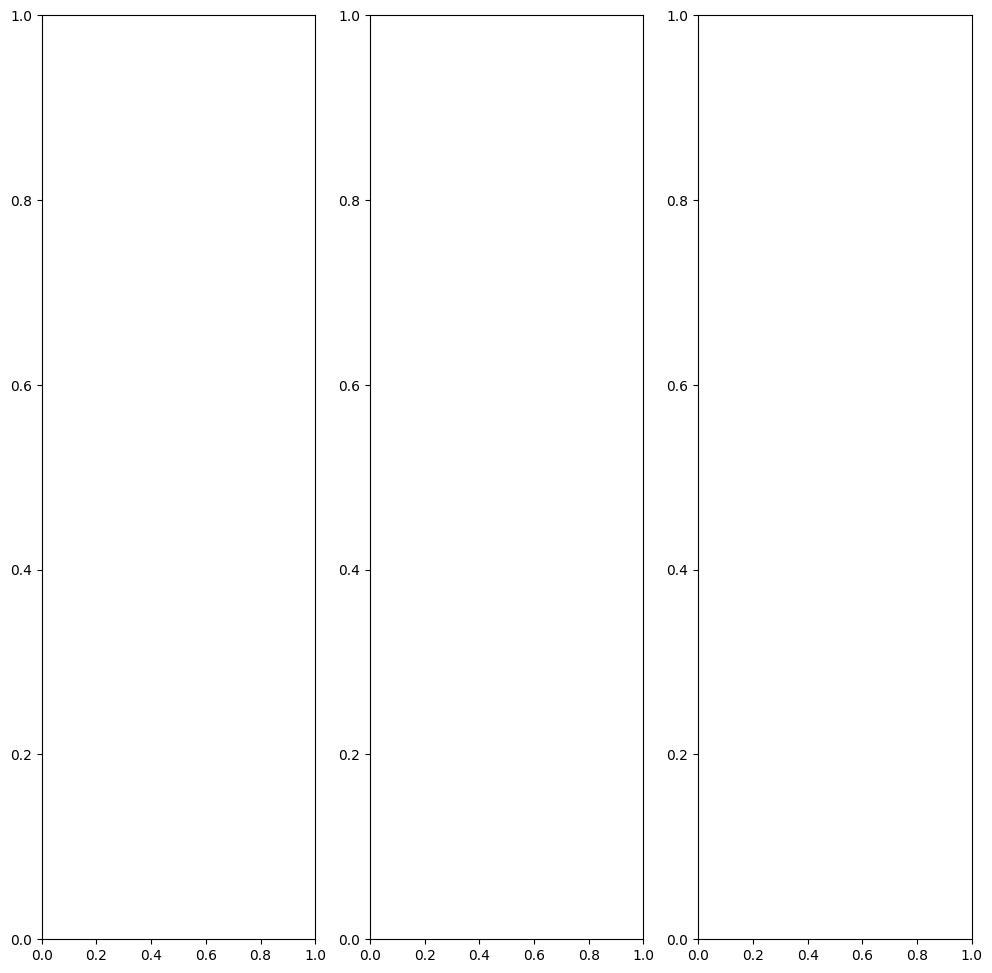

In [5]:
N, p = mydata.shape #64 3851
print(len(mydata.shape)) #2
U, E, VT = svd(mydata, full_matrices = False)

q = np.array([p/4, p/8, p/16]).astype("int") 

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] #xq = uq @ Eq @ vq.T
    # 將近似圖像轉換回 8x8 的小圖
    approx_patches = [Xq[:, i].reshape(8, 8) for i in range(Xq.shape[1])]
    
    # 將小圖重新組合成圖像(採用 np.vstack 以及 np.hstack 組回原本的圖像大小 512X512)
    approx_image = np.vstack([np.hstack([approx_patches[j*64+i] for i in range(64)]) for j in range(64)])     
    ax[i].imshow(approx_image, cmap = "gray")
    ax[i].set_title("Compression ratio: {}".format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

3.16*16

2


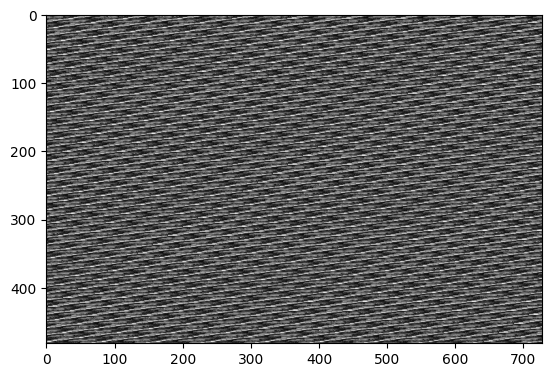

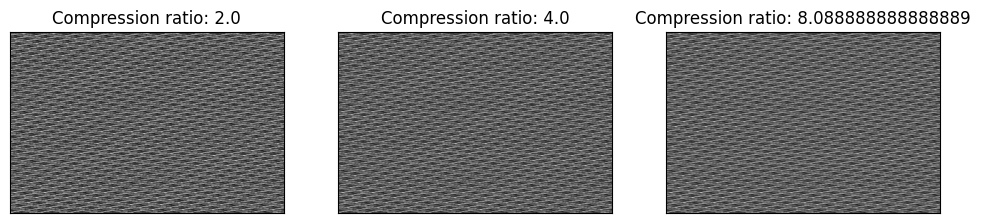

In [449]:
imgfile = "girl3.jpeg"
X = mpimg.imread(imgfile) #482 728
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

patches = patchify(X, (16, 16), step = 8)
mydata = np.zeros((64, 1))
for i in range(59):
    for j in range(80):
        a = patches[i, j, :, :]
        b = np.resize(a, (64, 1))
        mydata = np.hstack((mydata, b))

mydata = np.resize(mydata, (482, 728))
plt.imshow(mydata, cmap = "gray")


N, p = mydata.shape #64 3851
print(len(mydata.shape)) #2

U, E, VT = svd(mydata, full_matrices = False)

q = np.array([p/4, p/8, p/16]).astype("int") 

fig, ax = plt.subplots(1, 3, figsize=(12, 8))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] #xq = uq @ Eq @ vq.T
    ax[i].imshow(Xq, cmap = "gray")
    ax[i].set_title("Compression ratio: {}".format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

4.32*32

2


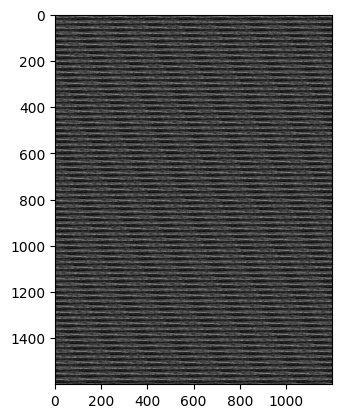

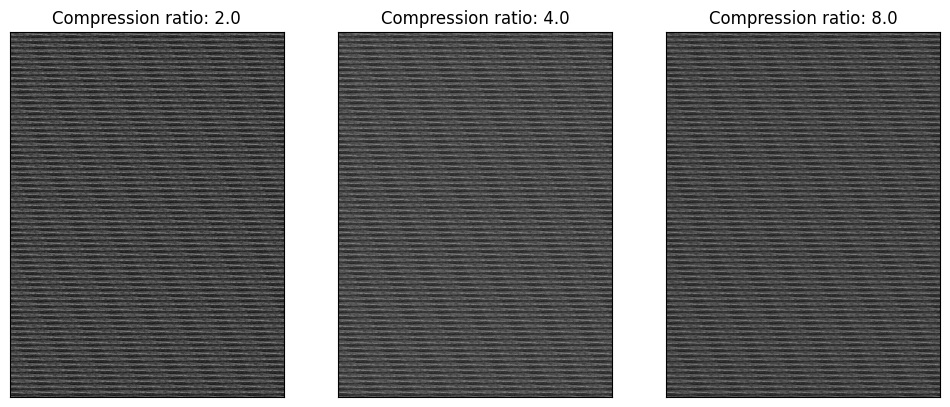

In [450]:
imgfile = "girl4.jpeg"
X = mpimg.imread(imgfile) #1600 1200
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

patches = patchify(X, (32, 32), step = 8)
mydata = np.zeros((64, 1))
for i in range(197):
    for j in range(147):
        a = patches[i, j, :, :]
        b = np.resize(a, (64, 1))
        mydata = np.hstack((mydata, b))

mydata = np.resize(mydata, (1600, 1200))
plt.imshow(mydata, cmap = "gray")


N, p = mydata.shape #64 3851
print(len(mydata.shape)) #2

U, E, VT = svd(mydata, full_matrices = False)

q = np.array([p/4, p/8, p/16]).astype("int") 

fig, ax = plt.subplots(1, 3, figsize=(12, 8))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] #xq = uq @ Eq @ vq.T
    ax[i].imshow(Xq, cmap = "gray")
    ax[i].set_title("Compression ratio: {}".format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

習題 2：處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態。以 70000 張手寫圖像為例，每個數字約 7000 字，需要寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像，如下圖左與圖右的影像不同。請靜下心來仔細寫這段程式碼，可以按下圖的方式呈現，或用自己的方式都歡迎。類似像這樣的程式基本功事非常重要且必要的。

In [451]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", parser = "auto", return_X_y = True)
X = X.T # 做轉置 # 變成p*N #784*70000
# 其中矩陣 X 內含 0 - 9 十個數字的圖形共 70000 張，每一列代表一張大小 28 × 28，的數字圖形（被轉換為 1 × 784的向量）

In [452]:
def montage(A, m, n):
#Create a montage matrix with mn images
#Inputs:
#A: original MxN image matrix with M images (N pixels), M > mn
#m, n: m rows & n columns, total mn images
#Output:
#M: montage matrix containing mn images
#’’’
    sz = np.sqrt(X.shape[0]).astype("int") # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
             M[i*sz : (i+1)*sz, j*sz : (j+1)*sz] = \
             A[:, i*n + j].reshape(sz, sz)
    return M

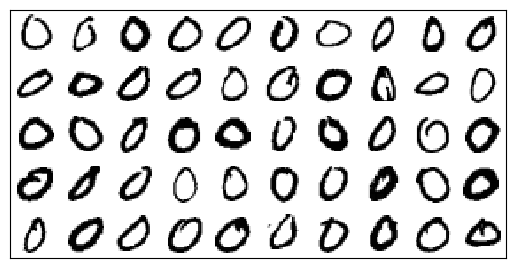

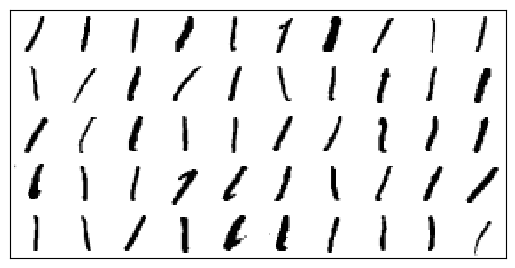

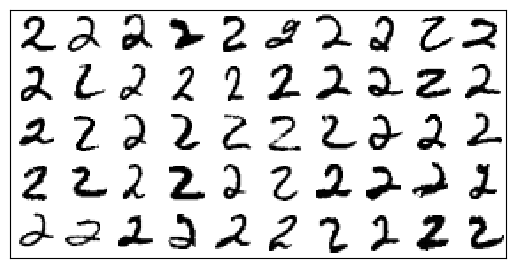

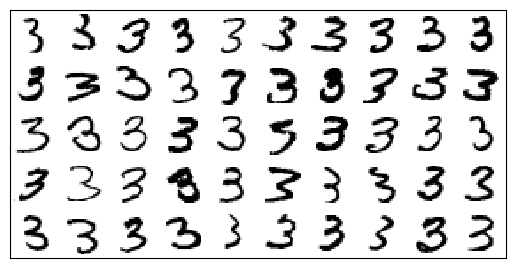

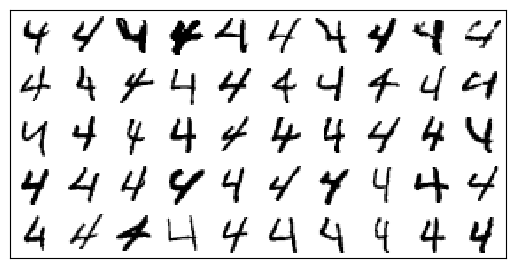

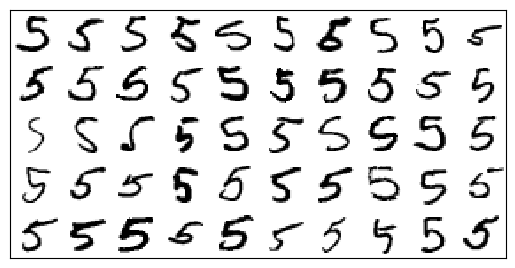

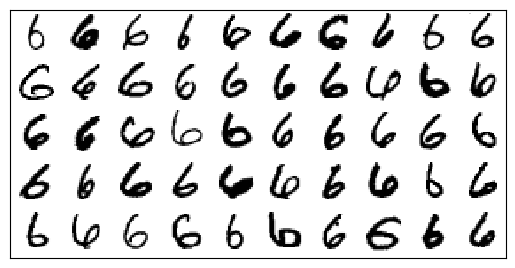

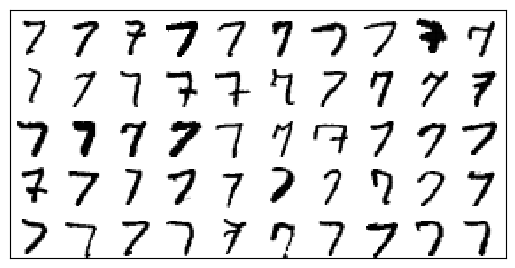

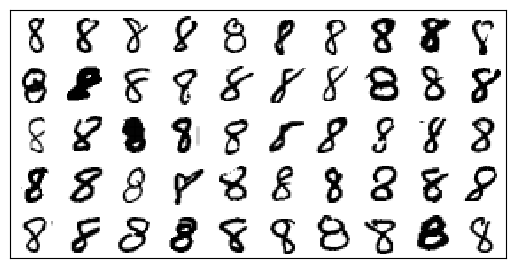

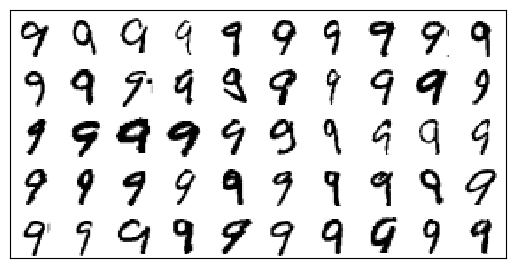

In [456]:
#digit_to_show = "0"
#print(digit_to_show)
digit_to_show = np.arange(0, 10)
m, n = 5, 10
#fig, ax = plt.subplots(5, 2, figsize = (10, 12))
for i in range(len(digit_to_show)):
    idx = y[y==str(digit_to_show[i])].index
    choose = np.random.choice(idx, replace = False, size = m * n)
    Digit = X.iloc[:, choose]
    #plt.figure(figsize = (12, 12))
    M = montage(np.array(Digit), m, n)
    plt.imshow(M, cmap = plt.cm.gray_r, interpolation = "nearest")
    plt.xticks([])
    plt.yticks([])
    plt.show()

習題 3：每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 q 的選擇可以根據 \sigma_1, \sigma_2, \cdots,  \sigma_r 的「能量配置」來決定，或說決定 q 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。

In [457]:
X, y = fetch_openml("mnist_784", parser = "auto", return_X_y = True)
X = X.T # 做轉置 # 變成p*N #784 70000

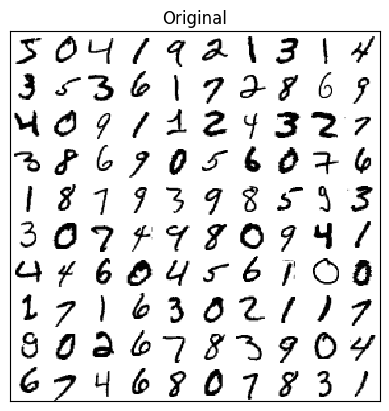

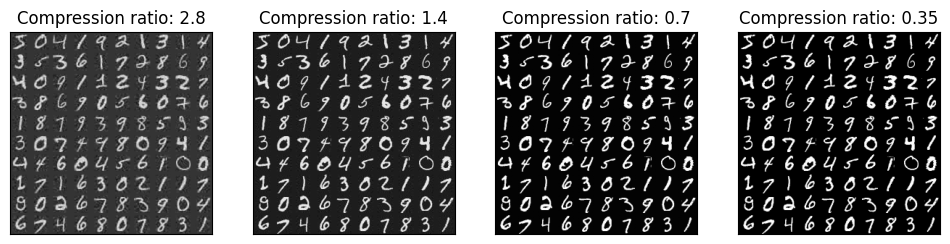

[2.8 1.4 0.7 0.4]


In [458]:
def montage(A, m, n):
    sz = np.sqrt(X.shape[0]).astype("int") # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
             M[i*sz : (i+1)*sz, j*sz : (j+1)*sz] = \
             A[:, i*n + j].reshape(sz, sz)
    return M
 
#呈現原本的100張圖
h, w = 10, 10 # A m x n montage (total mn images)
M = montage(np.array(X), h, w) #140*280
plt.imshow(M, cmap = plt.cm.gray_r, interpolation = "nearest")
plt.xticks([])
plt.yticks([])
plt.title("Original")
plt.show()



M = X = montage(np.array(X), h, w)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape
U, E, VT = svd(X, full_matrices = False) #m*m #m*n #n*n

#q = np.array([1, 10, 30])
q = np.array([50, 100, 200, 400])
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :] #xq = uq @ Eq @ vq.T
    ax[i].imshow(Xq, cmap = "gray")
    ax[i].set_title("Compression ratio: {}".format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

#主成份能量佔比
compress_ratio = (X.shape[0] * X.shape[1]) / (X.shape[0] * q + q * X.shape[0])
print(np.round(compress_ratio, 1))

習題 1：有 5 張經過加密的影像圖（壓縮檔下載），其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 X 的 SVD，即 X = U\Sigma V^T，取 U 作為影像加密的工具，即假設向量 x 代表一張原圖影像，則 U[:, 0:q]^T x 代表該影像的前 q 個主成分，以此作為加密影像。

1.請解密這 5 張影像。

2.自行找 5 張照片（大小必須同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行加密後（q 自選），再解密，觀察這些解密後的影像的效果，是否人臉的表現比較好？其他非人臉影像，如風景影像，能透過由人臉建構的特徵 U 加密嗎？（即解密後能否看到原圖模樣？）

In [459]:
import pandas as pd
data = pd.read_csv("/Users/guoyixuan/Documents/pythoncode/ccwML/五張加密的影像.csv")
#2000*5

import numpy as np
import scipy.io
D = scipy.io.loadmat("allFaces.mat")
X = D["faces"] # each column represents an image #32256*2410
y = np.ndarray.flatten(D["nfaces"]) #38 #每個人臉的張數
m = int(D["m"]) #168
n = int(D["n"]) #192
n_persons = int(D["person"]) #38

def show_montage(X, n, m, h, w):
    fig, axes = plt.subplots(1, 5, figsize=(10, 8))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()


In [460]:
avgFace = X.mean(axis=1).reshape(-1, 1)
X_avg = X - np.tile(avgFace, (1, X.shape[1]))
U, E, VT = svd(X_avg, full_matrices = False)

解密五張圖像之結果

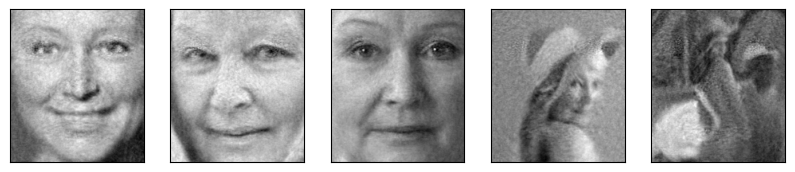

In [461]:
q = 2000
Uq = U[:, :q]
Xq = Uq @ data
show_montage(Xq, n, m, 5, 5)

In [462]:
#自行找圖片進行加密解密
from PIL import Image
from numpy import asarray
#imgfile = "/Users/guoyixuan/Documents/pythoncode/ccwML/girl.jpeg"
#mg = mpimg.imread(imgfile)

image = Image.open('scenary.jpeg')
new_image1 = image.resize((192, 168))
new_image1 = asarray(new_image1)

image = Image.open('scenary2.jpeg')
new_image2 = image.resize((192, 168))
new_image2 = asarray(new_image2)

image = Image.open('human.jpeg')
new_image3 = image.resize((192, 168))
new_image3 = asarray(new_image3)

image = Image.open('human2.jpeg')
new_image4 = image.resize((192, 168))
new_image4 = asarray(new_image4)

image = Image.open('fruit.jpeg')
new_image5 = image.resize((192, 168))
new_image5 = asarray(new_image5)

#import cv2
#img = cv2.imread("scenary.jpeg")
#res = cv2.resize(img, dsize=(192, 168))


In [463]:
#取出圖片矩陣
im1 = new_image1[:, :, 0].reshape(-1, 1) #32256 1
im2 = new_image2[:, :, 0].reshape(-1, 1)
im3 = new_image3[:, :, 0].reshape(-1, 1)
im4 = new_image4[:, :, 0].reshape(-1, 1)
im5 = new_image5[:, :, 0].reshape(-1, 1)
#new = pd.concat([im1, im2, im3, im4, im5])
n = 192
m = 168
mydata = np.hstack((im1, im2, im3, im4, im5)) #32256 5

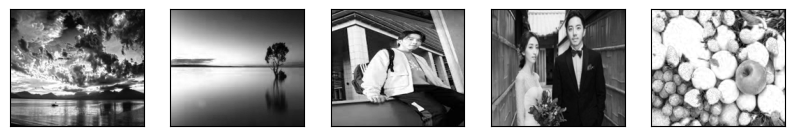

In [464]:
#原圖
def show_montage(X, n, m, h, w):
    fig, axes = plt.subplots(1, 5, figsize=(10, 12))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:, i].reshape(m, n), cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

h, w = 1, 5
show_montage(mydata, n, m, h, w)

根據下圖可以知道，隨著q值變大，解密結果越好，但是並不清晰會很模糊，而且人像圖片的效果是比較好的，水果跟風景還不錯，但第一張風景的結果很差

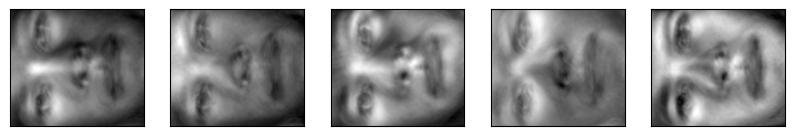

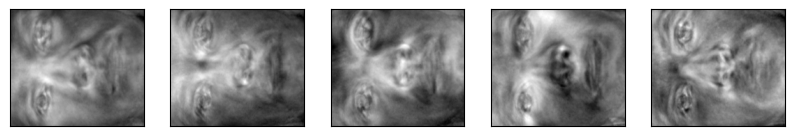

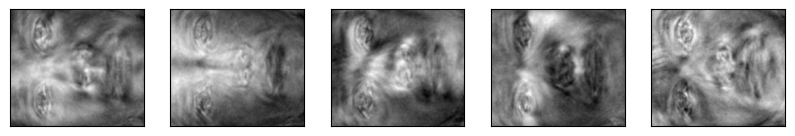

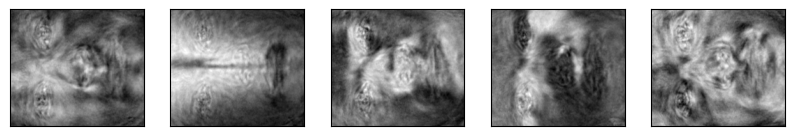

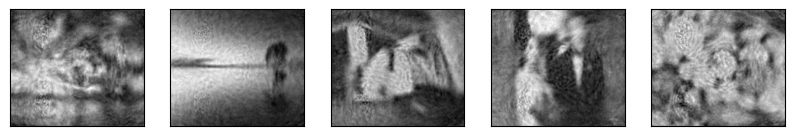

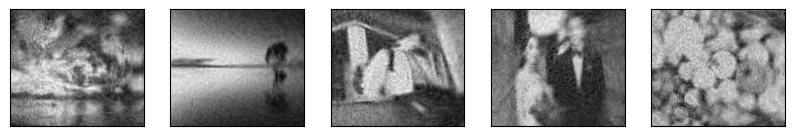

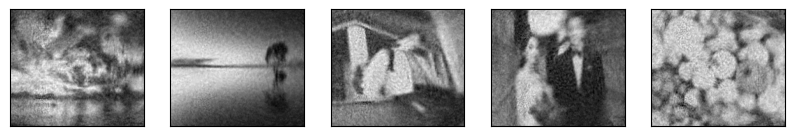

In [465]:
q = np.array([20, 100, 200, 400, 1000, 2000, 4000])
for i in q:
    Uq = U[:, :i]
    secret = U[:, 0:i].T @ mydata
    Xq = Uq @ secret
    show_montage(Xq, n, m, h, w)
